# Build basic 2-Layer MLP to solve the xor-Problem

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #for data generatio
from sklearn.model_selection import train_test_split #for test set generation
import torch

In [143]:
X, y = make_blobs(n_samples=200, n_features=2, cluster_std=.1
                  ,centers= [(1,1), (1,0), (0,0),(0,1)])

In [144]:
#make blobs into binary problem
y[y==2]=0
y[y==3]=1

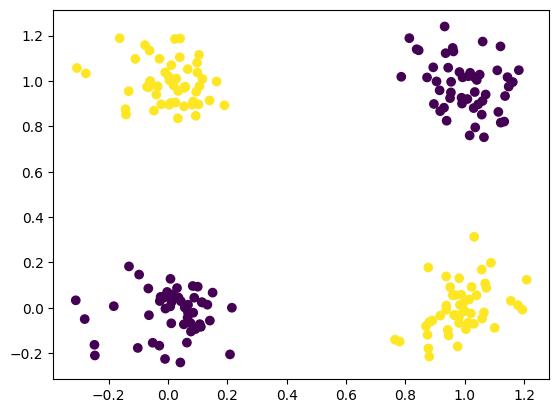

In [145]:
plt.scatter(X[:,0],X[:,1],c=y)

## Steps:
* build train and test sets
* write MLP class in Pytorch with two layers with adjustable number of perceptrons
* use nn.linear and nn.Sigmoid() units
* train your model
* test your model

# Build MLP

In [146]:
numbeOfPerceptrons = 2

class MLP(torch.nn.Module): #all nets inherit from nn.Module
    def __init__(self): #define layer types
        super(MLP, self).__init__()
        self.fc1 = torch.nn.Linear(2, numbeOfPerceptrons)  # First fully connected layer
        self.activation1 = torch.nn.Sigmoid()  # Activation function for the first layer
        self.fc2 = torch.nn.Linear(numbeOfPerceptrons, 1)  # Second fully connected layer
        self.activation2 = torch.nn.Sigmoid()  # Activation function for the second layer

    def forward(self, x):
        output = self.fc1(x)
        output = self.activation1(output)
        output = self.fc2(output)
        output = self.activation2(output)
        return output

# prepare training and test data

In [147]:
#split in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)#, random_state=42)

#np->torch
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

# get instance of model and set optimizer.  


In [148]:
#get instance of perceptron model
model = MLP()

#define loss function
criterion = torch.nn.BCELoss()

#define optimizer -> SGD with learning rate lr
optimizer = torch.optim.SGD(model.parameters(), lr = 0.05)

#run test data theogh untrained model
model.eval() #set to eval mode
model(X_test)

tensor([[0.3412],
        [0.3470],
        [0.3611],
        [0.3617],
        [0.3620],
        [0.3426],
        [0.3635],
        [0.3607],
        [0.3631],
        [0.3483],
        [0.3612],
        [0.3603],
        [0.3640],
        [0.3462],
        [0.3480],
        [0.3482],
        [0.3490],
        [0.3621],
        [0.3484],
        [0.3619],
        [0.3455],
        [0.3473],
        [0.3593],
        [0.3492],
        [0.3617],
        [0.3466],
        [0.3415],
        [0.3612],
        [0.3593],
        [0.3472],
        [0.3475],
        [0.3460],
        [0.3625],
        [0.3494],
        [0.3600],
        [0.3485],
        [0.3451],
        [0.3431],
        [0.3617],
        [0.3476],
        [0.3608],
        [0.3467],
        [0.3487],
        [0.3641],
        [0.3468],
        [0.3472],
        [0.3496],
        [0.3622],
        [0.3593],
        [0.3492],
        [0.3482],
        [0.3467],
        [0.3467],
        [0.3449],
        [0.3478],
        [0

# train


In [ ]:
model.train() #set to train mode
epoch = 50000
for epoch in range(epoch):
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(X_train)
    # Compute Loss
    loss = criterion(y_pred.squeeze(), y_train)

    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    # Backward pass
    loss.backward()
    #make gradient update
    optimizer.step()

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
Epoch 4520: train loss: 0.6641550660133362
Epoch 4521: train loss: 0.6641274094581604
Epoch 4522: train loss: 0.6640998125076294
Epoch 4523: train loss: 0.6640719771385193
Epoch 4524: train loss: 0.6640442609786987
Epoch 4525: train loss: 0.6640164852142334
Epoch 4526: train loss: 0.6639887094497681
Epoch 4527: train loss: 0.6639609932899475
Epoch 4528: train loss: 0.6639331579208374
Epoch 4529: train loss: 0.6639053225517273
Epoch 4530: train loss: 0.6638774275779724
Epoch 4531: train loss: 0.6638495326042175
Epoch 4532: train loss: 0.6638216376304626
Epoch 4533: train loss: 0.663793683052063
Epoch 4534: train loss: 0.6637657880783081
Epoch 4535: train loss: 0.6637377142906189
Epoch 4536: train loss: 0.663709819316864
Epoch 4537: train loss: 0.6636817455291748
Epoch 4538: train loss: 0.6636537909507751
Epoch 4539: train loss: 0.6636257171630859
Epoch 4540: train loss: 0.6635977029800415
Epoch 4541: train loss: 0.663569

# evaluate

In [ ]:
model.eval() #set model to eval mode

#train
y_pred = model(X_train) #predict
y_pred=(y_pred>0.5).int().flatten() #argmax class lable
train_acc =torch.sum(y_pred == y_train.int())/ y_train.shape[0]
print("train ACC: ",train_acc.float())

In [ ]:
#test
y_pred = model(X_test) #predict
y_pred=(y_pred>0.5).int().flatten() #argmax class lable
test_acc = torch.sum(y_pred == y_test.int()) / y_test.shape[0]
print("test ACC: ",test_acc.float())

In [ ]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)
plt.colorbar()